In [1]:
import matplotlib.pyplot as plt
import os
import time
from datetime import datetime
import argparse
import numpy as np
import gym
import torch
import random
from omegaconf import OmegaConf
from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3 import TD3
from stable_baselines3 import DDPG
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import (
    VecTransposeImage,
    VecFrameStack,
    VecNormalize,
)
from gym_pybullet_drones.envs.single_agent_rl.common.NotVecNormalize import (
    NotVecNormalize,
)
from stable_baselines3.common.env_util import make_vec_env
from gym_pybullet_drones.envs.single_agent_rl import map_name_to_env

from gym_pybullet_drones.utils.utils import sync
from gym_pybullet_drones.utils.Logger import Logger
from gym_pybullet_drones.envs.single_agent_rl.BaseSingleAgentAviary import (
    ActionType,
    ObservationType,
)
from gym_pybullet_drones.utils.utils import sync, str2bool

import shared_constants

pybullet build time: May 20 2022 19:44:17


In [3]:
def get_weights_print_stats(layer):
    #W = layer.get_weights()
    W = layer
    vals = []
    names = []
    print(len(W))
    for n, w in W.items():
        print(w.shape)
        vals.append(np.array(w.cpu()))
        names.append(n)
    return vals, names

def hist_weights(weights, names, bins=500):
    for names, weight in zip(names, weights):
        print(names)
        plt.hist(np.ndarray.flatten(weight), bins=bins)
        plt.show()


In [4]:
path = "results/save-cross-obstacles-ppo-BOTH-RPM-inc_difficulty_1_npt_seed_0_collision-10.07.2022_11.44.14/best_model.zip"
path = "/home/mtrang/Documents/vt/research/multiagent-pybullet-drones/experiments/learning/results/inc_difficulty_w_wall/save-cross-obstacles-ppo-BOTH-RPM-inc_difficulty_11-09.14.2022_01.21.40/best_model.zip"
path = "/home/mtrang/Documents/vt/research/multiagent-pybullet-drones/experiments/learning/results/save-cross-obstacles-ppo-BOTH-RPM-naive_4-10.13.2022_21.39.25/success_model.zip"
model = PPO.load(path)

27
torch.Size([4])
torch.Size([32, 4, 8, 8])
torch.Size([32])
torch.Size([64, 32, 4, 4])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([256, 512])
torch.Size([256])
torch.Size([512, 268])
torch.Size([512])
torch.Size([256, 512])
torch.Size([256])
torch.Size([256, 256])
torch.Size([256])
torch.Size([256, 256])
torch.Size([256])
torch.Size([256, 256])
torch.Size([256])
torch.Size([256, 256])
torch.Size([256])
torch.Size([256, 256])
torch.Size([256])
torch.Size([4, 256])
torch.Size([4])
torch.Size([1, 256])
torch.Size([1])
log_std


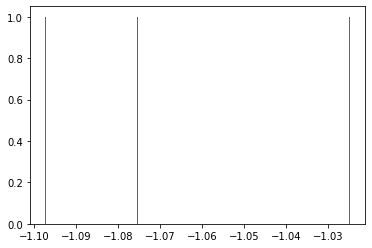

features_extractor.extractors.img.cnn.0.weight


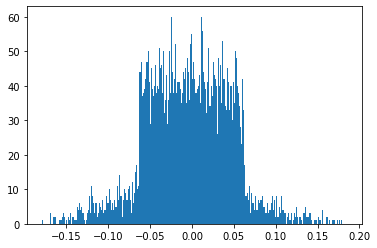

features_extractor.extractors.img.cnn.0.bias


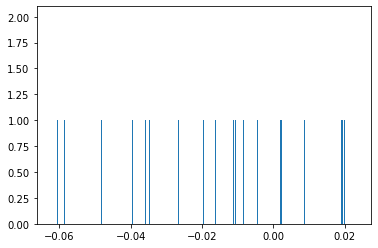

features_extractor.extractors.img.cnn.2.weight


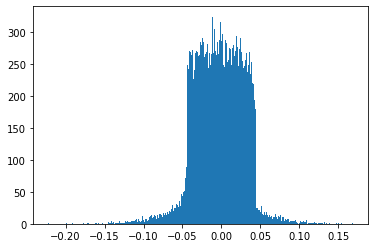

features_extractor.extractors.img.cnn.2.bias


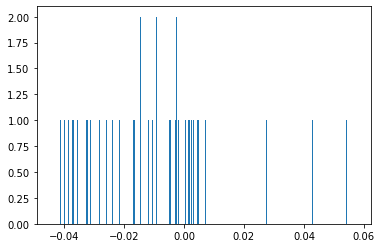

features_extractor.extractors.img.cnn.4.weight


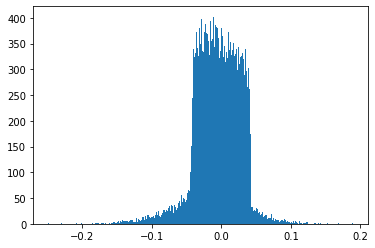

features_extractor.extractors.img.cnn.4.bias


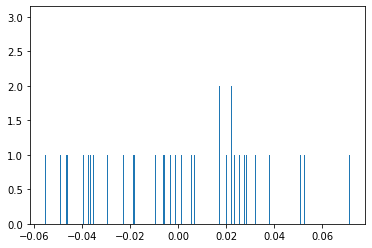

features_extractor.extractors.img.linear.0.weight


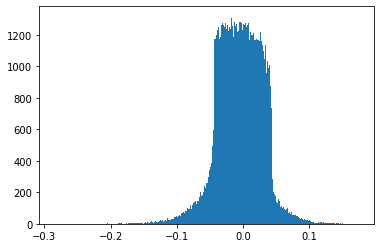

features_extractor.extractors.img.linear.0.bias


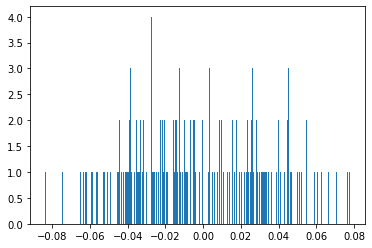

mlp_extractor.shared_net.0.weight


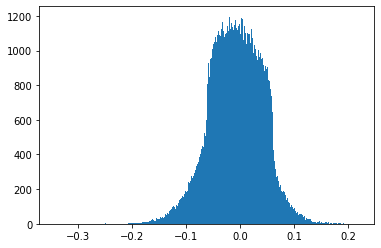

mlp_extractor.shared_net.0.bias


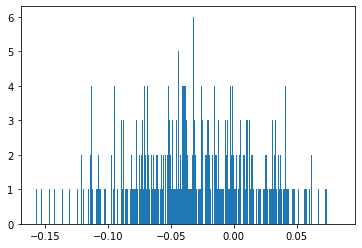

mlp_extractor.shared_net.2.weight


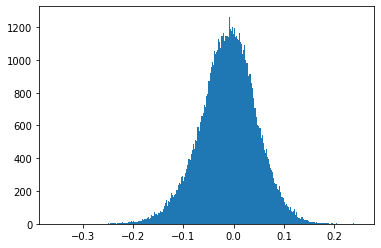

mlp_extractor.shared_net.2.bias


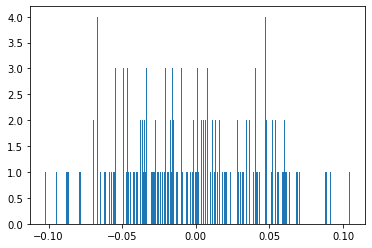

mlp_extractor.shared_net.4.weight


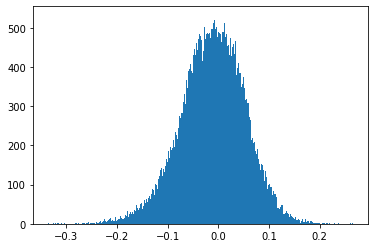

mlp_extractor.shared_net.4.bias


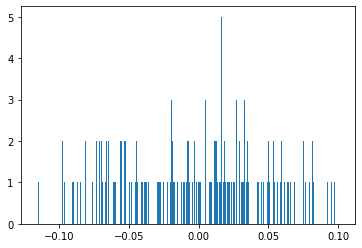

mlp_extractor.policy_net.0.weight


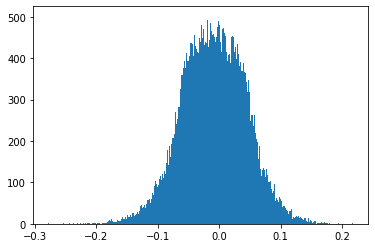

mlp_extractor.policy_net.0.bias


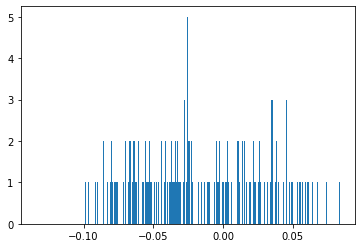

mlp_extractor.policy_net.2.weight


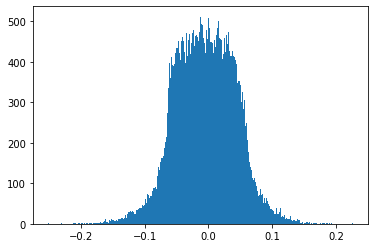

mlp_extractor.policy_net.2.bias


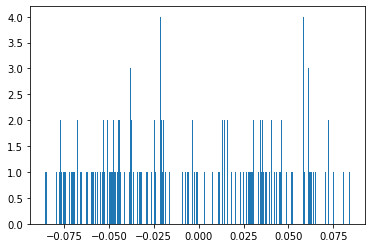

mlp_extractor.value_net.0.weight


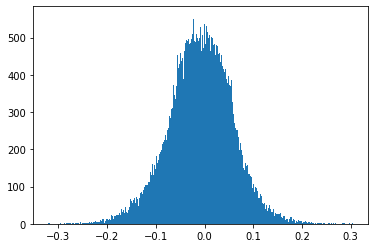

mlp_extractor.value_net.0.bias


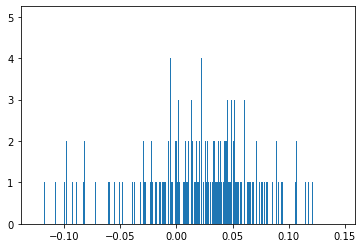

mlp_extractor.value_net.2.weight


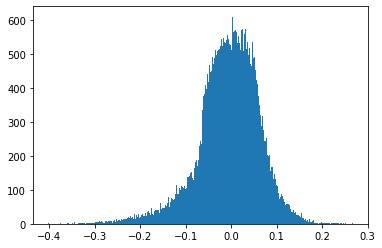

mlp_extractor.value_net.2.bias


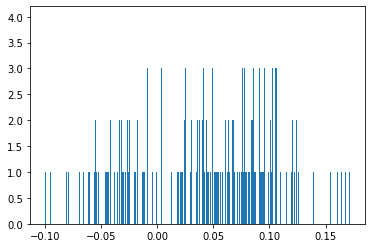

action_net.weight


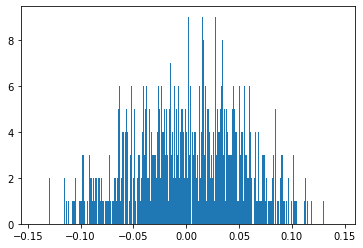

action_net.bias


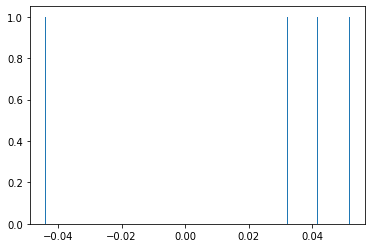

value_net.weight


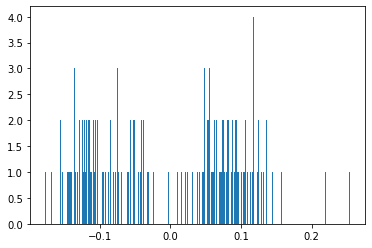

value_net.bias


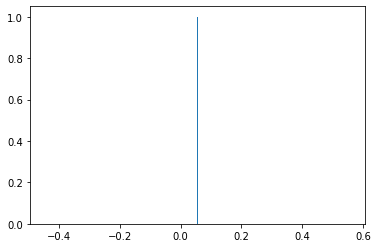

In [5]:
params = model.get_parameters()
W, n = get_weights_print_stats(params["policy"])
hist_weights(W, n)